# Cifar dataset.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
(Website: https://www.cs.toronto.edu/~kriz/cifar.html)

The class labels are:

| Labels | Description |
|---|---|
| 0 | airplane |									
| 1 | automobile |
| 2 | bird |									
| 3 | cat |									
| 4 | deer |									
| 5 | dog |									
| 6 | frog |									
| 7 | horse	|									
| 8 | ship |									
| 9 | truck |

You can review state of the art results there: http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten, Dropout, Activation

Using TensorFlow backend.


## 1. Load the dataset

In [10]:
# Load the dataset.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Set the number of classes.
num_classes = np.max(y_train) + 1

# Set the class labels.
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

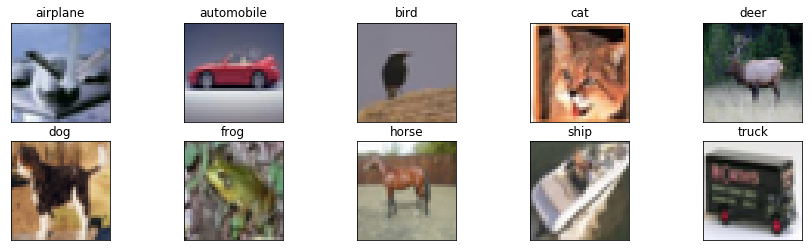

In [13]:
# Display an image for each class.
fig = plt.figure(figsize=(15,4))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:] == i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    plt.imshow(im, cmap = "gray")
    plt.title("{}".format(labels[i]))
plt.show()

## 2. Handle the data.

In [16]:
# Process the images.
x_tr = x_tr / 255
x_te = x_te / 255

# Display the images size.
print("x_tr size = {}".format(x_tr.shape))
print("x_te size = {}".format(x_te.shape))

y_tr size = (50000, 32, 32, 3)
y_te size = (10000, 32, 32, 3)


In [17]:
# Process the classes.
y_tr = to_categorical(y_train, num_classes)
y_te = to_categorical(y_test, num_classes)

# Display the classes size.
print("y_tr size = {}".format(y_tr.shape))
print("y_te size = {}".format(y_te.shape))

y_tr size = (50000, 10)
y_te size = (10000, 10)


## Train the model.

In [32]:
# Build the model.
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

# Set the optimizer.
optimizer = keras.optimizers.Adam(lr=0.001, decay=1e-6)

# Compile the model.
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

# Parameter fitting.
fit_params = {
    "batch_size": 128,
    "epochs": 12,
    "verbose": 1,
    "shuffle": True,
    "validation_data": (x_te, y_te)
}

# Fit the model.
history = model.fit(x_tr, y_tr, **fit_params)

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 198s 4ms/step - loss: 1.6505 - acc: 0.3946 - val_loss: 1.2910 - val_acc: 0.5336
Epoch 2/12
50000/50000 [==============================] - 180s 4ms/step - loss: 1.2504 - acc: 0.5541 - val_loss: 1.0751 - val_acc: 0.6181
Epoch 3/12
50000/50000 [==============================] - 189s 4ms/step - loss: 1.0862 - acc: 0.6166 - val_loss: 1.0311 - val_acc: 0.6435
Epoch 4/12
50000/50000 [==============================] - 205s 4ms/step - loss: 0.9644 - acc: 0.6598 - val_loss: 0.8396 - val_acc: 0.7099
Epoch 5/12
50000/50000 [==============================] - 211s 4ms/step - loss: 0.8791 - acc: 0.6908 - val_loss: 0.8173 - val_acc: 0.7157
Epoch 6/12
50000/50000 [==============================] - 203s 4ms/step - loss: 0.8214 - acc: 0.7105 - val_loss: 0.7795 - val_acc: 0.7339
Epoch 7/12
50000/50000 [==============================] - 184s 4ms/step - loss: 0.7638 - acc: 0.7305 - val_loss: 0.7267 - 

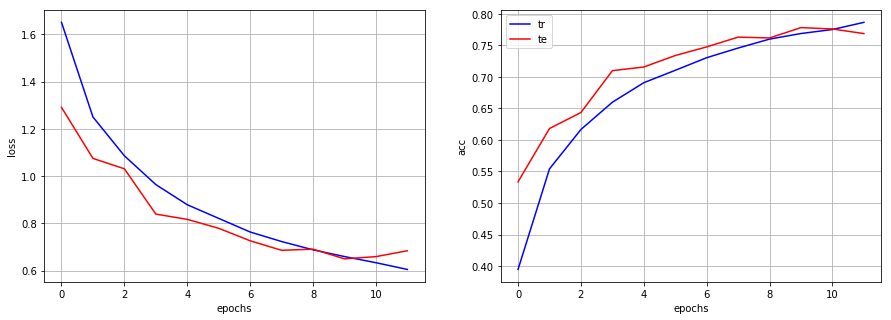

In [33]:
# Visualise the training resuls.
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history.history["loss"], color="b", label="tr")
plt.plot(history.history["val_loss"], color="r", label="te")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.grid()
plt.subplot(122)
plt.plot(history.history["acc"], color="b", label="tr")
plt.plot(history.history["val_acc"], color="r", label="te")
plt.ylabel("acc")
plt.xlabel("epochs")
plt.grid()
plt.legend()
plt.show()

In [34]:
# Save the model.
model.save("models/cifar10.h5")

## 4. Evaluation

We can evaluate the model now, first we have to load it.

In [35]:
# Set the model filepath.
filepath = "models/cifar10.h5"

# Load the model.
model = keras.models.load_model(filepath)

In [36]:
# Model test inference.
y_pred = model.predict(x_te)
y_pred = np.eye(num_classes)[np.argmax(y_pred, axis=1).reshape(-1)]

# Display the classification report.
print(classification_report(y_te, y_pred, target_names=labels, digits=4))

             precision    recall  f1-score   support

   airplane     0.8753    0.7300    0.7961      1000
 automobile     0.9342    0.8380    0.8835      1000
       bird     0.7355    0.5950    0.6578      1000
        cat     0.5428    0.6340    0.5849      1000
       deer     0.7088    0.7570    0.7321      1000
        dog     0.6438    0.7230    0.6811      1000
       frog     0.7532    0.8730    0.8087      1000
      horse     0.8428    0.8150    0.8287      1000
       ship     0.8934    0.8550    0.8738      1000
      truck     0.8517    0.8670    0.8593      1000

avg / total     0.7782    0.7687    0.7706     10000

